# Importaçao de bibliotecas

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

# Instância de conexão com o banco de dados DataMart

In [153]:
usuario = "root"
senha = "root"
url = "localhost"
porta = "3306"
banco = "ENEM_DM"

# Criar uma conexão com o banco de dados MySQL
engine_dm = create_engine(f"mysql+pymysql://{usuario}:{senha}@{url}:{porta}/{banco}")

# Gráfico da média da redação por cor/raça e sexo

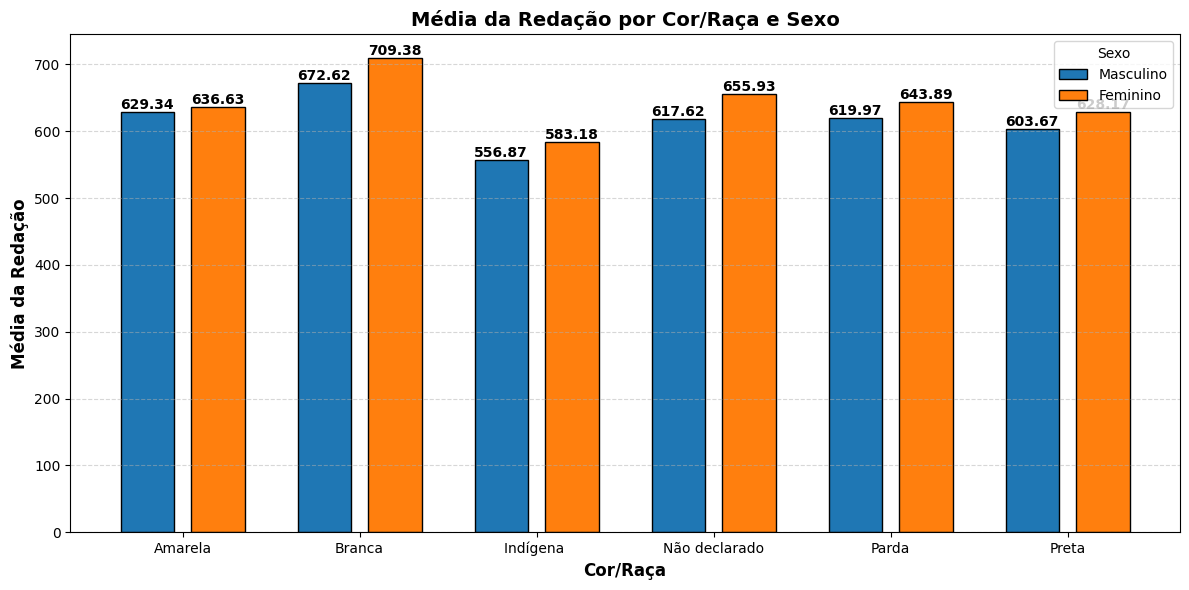

In [154]:
query = """
  SELECT
    COR_RACA,
    SEXO,
    AVG(
      NU_NOTA_REDACAO
    ) AS MEDIA_REDACAO
  FROM
    FAT_NOTAS
    JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
    JOIN DIM_SEXO USING (SK_SEXO)
    JOIN DIM_COR_RACA USING (SK_COR_RACA)
    JOIN DIM_STATUS_REDACAO USING (SK_STATUS_REDACAO)
  WHERE
    TP_STATUS_REDACAO = 1
  GROUP BY
    COR_RACA,
    SEXO
  ORDER BY
    COR_RACA,
    SEXO DESC
"""

df = pd.read_sql_query(query, con=engine_dm)

df["SEXO"] = df["SEXO"].str.replace(" ", "")

pivot_df = df.pivot(index="COR_RACA", columns="SEXO", values="MEDIA_REDACAO")

fig, ax = plt.subplots(figsize=(12, 6))

# Definir a largura das barras e o deslocamento para o gap
espessura_barra = 0.3
gap = 0.1

indices = np.arange(len(pivot_df))

bars_masc = ax.bar(
    indices - (espessura_barra / 2 + gap / 2),
    pivot_df["Masculino"],
    width=espessura_barra,
    label="Masculino",
    edgecolor="black",
    linewidth=1,
)

bars_fem = ax.bar(
    indices + (espessura_barra / 2 + gap / 2),
    pivot_df["Feminino"],
    width=espessura_barra,
    label="Feminino",
    edgecolor="black",
    linewidth=1,
)

# Adicionar os valores em cima das barras
for bars in [bars_masc, bars_fem]:
    for bar in bars:
        ax.annotate(
            f"{bar.get_height():.2f}",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )

ax.set_title("Média da Redação por Cor/Raça e Sexo", fontsize=14, fontweight="bold")
ax.set_xlabel("Cor/Raça", fontsize=12, fontweight="bold")
ax.set_ylabel("Média da Redação", fontsize=12, fontweight="bold")
ax.set_xticks(indices)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sexo")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Gráfico da média das provas por cor/raça e sexo

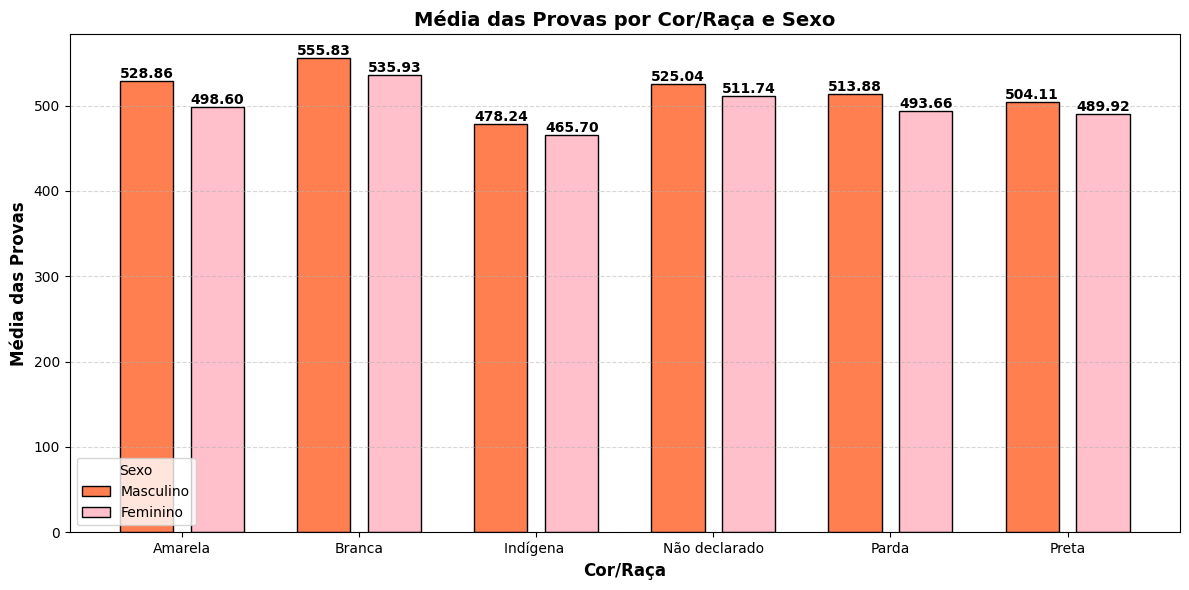

In [158]:
query = """
  SELECT
    COR_RACA,
    SEXO,
    AVG(MEDIA_PROVA) AS MEDIA_PROVA
  FROM
    (
      SELECT
        COR_RACA,
        SEXO,
        (NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC + NU_NOTA_MT) / 4 AS MEDIA_PROVA
      FROM
        FAT_NOTAS
        JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
        JOIN DIM_SEXO USING (SK_SEXO)
        JOIN DIM_COR_RACA USING (SK_COR_RACA)
        JOIN DIM_PRESENCA_CN USING (SK_PRESENCA_CN)
        JOIN DIM_PRESENCA_CH USING (SK_PRESENCA_CH)
        JOIN DIM_PRESENCA_LC USING (SK_PRESENCA_LC)
        JOIN DIM_PRESENCA_MT USING (SK_PRESENCA_MT)
      WHERE
        1 = 1
        AND TP_PRESENCA_CN = 1
        AND TP_PRESENCA_CH = 1
        AND TP_PRESENCA_LC = 1
        AND TP_PRESENCA_MT = 1
    ) SUB
  GROUP BY
    COR_RACA,
    SEXO
  ORDER BY
    COR_RACA,
    SEXO DESC
"""

df = pd.read_sql_query(query, con=engine_dm)

df["SEXO"] = df["SEXO"].str.replace(" ", "")

pivot_df = df.pivot(index="COR_RACA", columns="SEXO", values="MEDIA_PROVA")

fig, ax = plt.subplots(figsize=(12, 6))

# Definir a largura das barras e o deslocamento para o gap
espessura_barra = 0.3
gap = 0.1

indices = np.arange(len(pivot_df))

bars_masc = ax.bar(
    indices - (espessura_barra / 2 + gap / 2),
    pivot_df["Masculino"],
    width=espessura_barra,
    label="Masculino",
    edgecolor="black",
    linewidth=1,
    color="coral",
)

bars_fem = ax.bar(
    indices + (espessura_barra / 2 + gap / 2),
    pivot_df["Feminino"],
    width=espessura_barra,
    label="Feminino",
    edgecolor="black",
    linewidth=1,
    color="pink",
)

# Adicionar os valores em cima das barras
for bars in [bars_masc, bars_fem]:
    for bar in bars:
        ax.annotate(
            f"{bar.get_height():.2f}",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )

ax.set_title("Média das Provas por Cor/Raça e Sexo", fontsize=14, fontweight="bold")
ax.set_xlabel("Cor/Raça", fontsize=12, fontweight="bold")
ax.set_ylabel("Média das Provas", fontsize=12, fontweight="bold")
ax.set_xticks(indices)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sexo")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Gráfico da média das notas de provas e redação por perguntas do questionário sócio-econômico

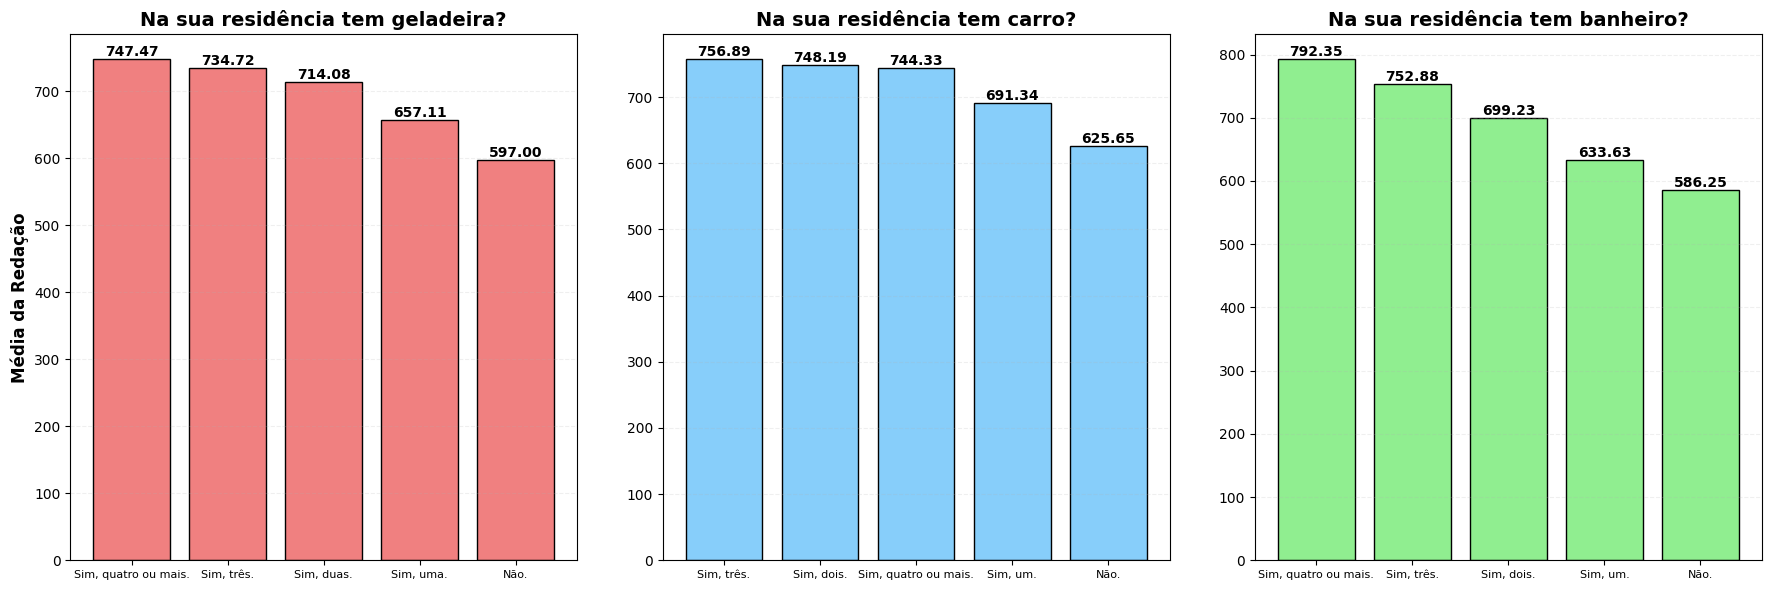

In [156]:
query = """
  SELECT
    RESP_QUESTAO_12,
    AVG(
      NU_NOTA_REDACAO
    ) AS MEDIA_REDACAO
  FROM
    FAT_NOTAS
    JOIN FAT_QUESTIONARIO USING (SK_PARTICIPANTES)
    JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
    JOIN DIM_STATUS_REDACAO USING (SK_STATUS_REDACAO)
    JOIN DIM_RESP_QUESTAO_12 USING (SK_RESP_QUESTAO_12)
  WHERE
    TP_STATUS_REDACAO = 1
  GROUP BY
    RESP_QUESTAO_12
  ORDER BY
    MEDIA_REDACAO DESC
"""

df_q12 = pd.read_sql_query(query, con=engine_dm)

query = """
  SELECT
    RESP_QUESTAO_10,
    AVG(
      NU_NOTA_REDACAO
    ) AS MEDIA_REDACAO
  FROM
    FAT_NOTAS
    JOIN FAT_QUESTIONARIO USING (SK_PARTICIPANTES)
    JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
    JOIN DIM_STATUS_REDACAO USING (SK_STATUS_REDACAO)
    JOIN DIM_RESP_QUESTAO_10 USING (SK_RESP_QUESTAO_10)
  WHERE
    TP_STATUS_REDACAO = 1
  GROUP BY
    RESP_QUESTAO_10
  ORDER BY
    MEDIA_REDACAO DESC
"""

df_q10 = pd.read_sql_query(query, con=engine_dm)

query = """
  SELECT
    RESP_QUESTAO_8,
    AVG(
      NU_NOTA_REDACAO
    ) AS MEDIA_REDACAO
  FROM
    FAT_NOTAS
    JOIN FAT_QUESTIONARIO USING (SK_PARTICIPANTES)
    JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
    JOIN DIM_STATUS_REDACAO USING (SK_STATUS_REDACAO)
    JOIN DIM_RESP_QUESTAO_8 USING (SK_RESP_QUESTAO_8)
  WHERE
    TP_STATUS_REDACAO = 1
  GROUP BY
    RESP_QUESTAO_8
  ORDER BY
    MEDIA_REDACAO DESC
"""

df_q8 = pd.read_sql_query(query, con=engine_dm)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

fig.subplots_adjust(wspace=8)

cores = [
    "lightcoral",
    "lightskyblue",
    "lightgreen",
]

# Função para plotar cada gráfico
def plot_bar(ax, df, coluna_questao, titulo, cor):
    bars = ax.bar(
        df[coluna_questao],
        df["MEDIA_REDACAO"],
        edgecolor="black",
        linewidth=1,
        color=cor,
    )
    ax.set_title(titulo, fontsize=14, fontweight="bold")
    ax.set_xlabel("")
    ax.set_xticks(range(len(df[coluna_questao])))
    ax.set_xticklabels(df[coluna_questao], fontsize=8)
    ax.grid(axis="y", linestyle="--", alpha=0.2)

    # Adicionar os valores em cima das barras
    for bar in bars:
        ax.annotate(
            f"{bar.get_height():.2f}",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )


# Plotar o gráfico para cada DataFrame
plot_bar(
    axes[0], df_q12, "RESP_QUESTAO_12", "Na sua residência tem geladeira?", cores[0]
)
plot_bar(axes[1], df_q10, "RESP_QUESTAO_10", "Na sua residência tem carro?", cores[1])
plot_bar(axes[2], df_q8, "RESP_QUESTAO_8", "Na sua residência tem banheiro?", cores[2])

axes[0].set_ylabel("Média da Redação", fontsize=12, fontweight="bold")

# Ajustar o layout
plt.tight_layout()
plt.show()

# Gráfico da média da redação e das provas por categoria de treineiro

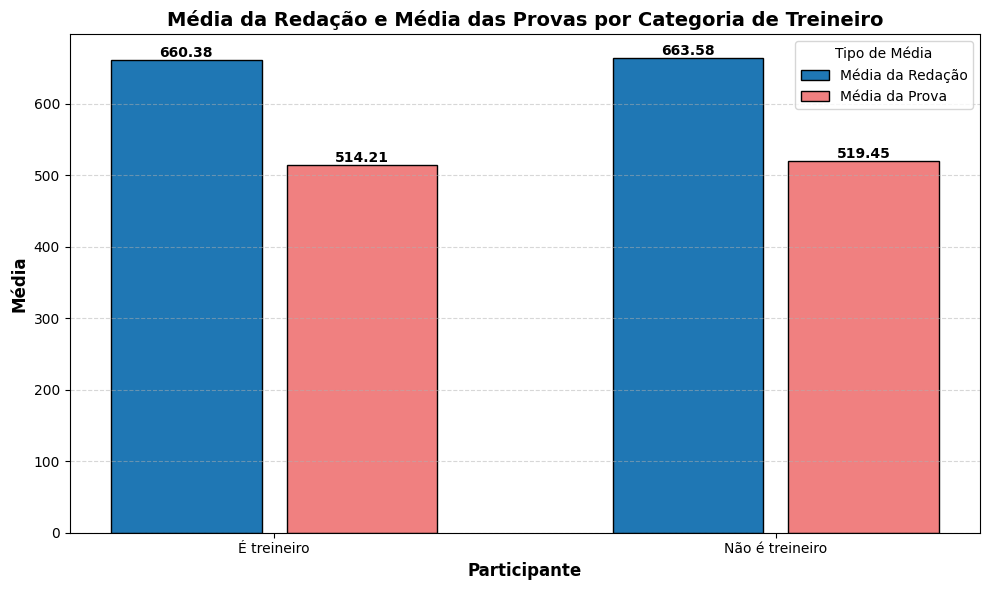

In [157]:
query = """
  SELECT
    TREINEIRO,
    AVG(NU_NOTA_REDACAO) AS MEDIA_REDACAO,
    AVG(MEDIA_PROVA) AS MEDIA_PROVA
  FROM
    (
      SELECT
        TREINEIRO,
        NU_NOTA_REDACAO,
        (NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC + NU_NOTA_MT) / 4 AS MEDIA_PROVA
      FROM
        FAT_NOTAS
        JOIN DIM_PARTICIPANTES USING (SK_PARTICIPANTES)
        JOIN DIM_SEXO USING (SK_SEXO)
        JOIN DIM_COR_RACA USING (SK_COR_RACA)
        JOIN DIM_PRESENCA_CN USING (SK_PRESENCA_CN)
        JOIN DIM_PRESENCA_CH USING (SK_PRESENCA_CH)
        JOIN DIM_PRESENCA_LC USING (SK_PRESENCA_LC)
        JOIN DIM_PRESENCA_MT USING (SK_PRESENCA_MT)
        JOIN DIM_TREINEIRO USING (SK_TREINEIRO)
        JOIN DIM_STATUS_REDACAO USING (SK_STATUS_REDACAO)
      WHERE
        1 = 1
        AND TP_PRESENCA_CN = 1
        AND TP_PRESENCA_CH = 1
        AND TP_PRESENCA_LC = 1
        AND TP_PRESENCA_MT = 1
        AND TP_STATUS_REDACAO = 1
    ) SUB
  GROUP BY
    TREINEIRO
  ORDER BY
    MEDIA_REDACAO
"""

df = pd.read_sql_query(query, con=engine_dm)

fig, ax = plt.subplots(figsize=(10, 6))

espessura_barra = 0.3
gap = 0.05

indices = np.arange(len(df["TREINEIRO"]))

bars_redacao = ax.bar(
    indices - (espessura_barra / 2 + gap / 2),
    df["MEDIA_REDACAO"],
    width=espessura_barra,
    label="Média da Redação",
    edgecolor="black",
    linewidth=1,
)
bars_prova = ax.bar(
    indices + (espessura_barra / 2 + gap / 2),
    df["MEDIA_PROVA"],
    width=espessura_barra,
    label="Média da Prova",
    edgecolor="black",
    linewidth=1,
    color="lightcoral",
)

# Adicionar os valores em cima das barras
for bars in [bars_redacao, bars_prova]:
    for bar in bars:
        ax.annotate(
            f"{bar.get_height():.2f}",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )

# Títulos e rótulos
ax.set_title(
    "Média da Redação e Média das Provas por Categoria de Treineiro",
    fontsize=14,
    fontweight="bold",
)
ax.set_xlabel("Participante", fontsize=12, fontweight="bold")
ax.set_ylabel("Média", fontsize=12, fontweight="bold")
ax.set_xticks(indices)
ax.set_xticklabels(["É treineiro", "Não é treineiro"], fontsize=10)
ax.legend(title="Tipo de Média")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Ajuste do layout e exibição do gráfico
plt.tight_layout()
plt.show()